# ** Udacity Data Analyst Nanodegree ** #

** Author: Bob Cross **

** Date: October 3, 2016 **



In [2]:
# import needed ananlysis libraries

# get started with importing pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# ** Background Information ** #
### ** What is a 'walk' in baseball? ** ### 
As described by Pro Baseball Insider a walk or base on balls (BB) refers to when a batter advances to 1st base because of 4 balls, or 4 pitches outside the strike zone.
### ** Sooooo, what and where is the strike zone for a baseball player? ** ###
and this is where it get's interesting . . . 
A Business Insider magazine 2014 article titled "What An MLB Strike Zone Really Looks Like And Why Players Are Always So Mad About It" puts it this way "the strike zone remains the most frustrating aspect of a baseball game."
The article goes on to provide the formal definition of the baseball strike zone:
According to rule 2.00 of the Major League Baseball rule book, a strike zone is defined as "that area over home plate the upper limit of which is a horizontal line at the midpoint between the top of the shoulders and the top of the uniform pants, and the lower level is a line at the hollow beneath the kneecap" and is determined by "the batter's stance as the batter is prepared to swing at a pitched ball" as determined by the umpire.


**HUH ???**
Let's see a picture so we can get a better understanding of the Strike Zone.

![Image of Baseball Strike Zone](http://static3.businessinsider.com/image/5419ddfa6bb3f7d06e8e964b-714-637/9-17-2014%202-09-32%20pm.jpg)

The Stirke Zone is also dependent on "the batter's stance as the batter is prepared to swing at a pitched ball". Numerous sources have generalized that the height of the Strike Zone is approximately 40% of a players overall height. Additionally, the width of the Strike Zone is determined by home plate which is 17" wide. 

# ** Questions for Investigation ** #

1. The overriding question of this investigation is: Do shorter players get more walks in baseball because of a reduced strile zone?
2. What is the average height of a player and who are the tallest and shortest players to ever play in Major Leagur Baseball?
3. What is the area of the rectangular strike zone for: a) the average player, b) the tallest 10% and c) the shortest 10%. Additionally, what is the strile zone size relationship to the percintile groups?  

# ** Dataset ** #

The 2015 version of The Lahman Baseball Database contains complete batting and pitching statistics from 1871 to 2015, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. The Master data file (player names, DOB, and biographical info) and Batting data file (regular season batting statistics) tables are required for this analysis.
The full database and a detailed description of its contents can be found on Sean Lahman's website.

In [3]:
#import the first  of two csv files needed for this analysis from The Lanman Baseball Dataset and review the fields

master_df = pd.read_csv('master.csv')
master_df.head(5)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [4]:
#import the second  of two csv files needed for this analysis from The Lanman Baseball Dataset and review the fields

batting_df = pd.read_csv('batting.csv')
batting_df.head(5)
batting_df.describe()


,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,101332.000000,101332.000000,101332.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,96183.000000,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1963.506533,1.077567,51.400111,149.970327,19.887038,39.261647,6.637067,1.373361,2.949305,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.628278,0.283676,47.145273,186.557072,28.671365,53.310941,9.801563,2.710547,6.409662,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1933.000000,1.000000,13.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1972.000000,1.000000,34.000000,57.000000,5.000000,11.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1997.000000,1.000000,80.250000,251.000000,30.000000,63.000000,10.000000,2.000000,3.000000,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,2015.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


# ** Data Wrangling ** #

### ** Missing Data ** ###
The next cells:
1. remove 805 player entries that have no height reported.
2. the average player is roughly 6 feet tall with the tallest player having been 6'11" and the shortest being 3'7"

### ** Fun Fact ** ###
On August 19, 1951, weighing 65 pounds (29 kg) and standing 3 feet 7 inches (109 cm) tall, Eddie Gaedel became the shortest player in the history of the Major Leagues. He made a single plate appearance and was walked with four consecutive balls.  His jersey, bearing the uniform number "1⁄8", is displayed in the St. Louis Cardinals Baseball Hall of Fame and Museum.

In [5]:
player_info = master_df[['playerID', 'nameLast', 'height']]
len(player_info)


18846

In [6]:
player_info = player_info[np.isfinite(player_info['height'])]
len(player_info)

18041

In [31]:
player_info["height"].mean()

72.25563993126767

In [16]:
shortest_player = player_info.loc[player_info['height'].idxmin()]
tallest_player = player_info.loc[player_info['height'].idxmax()]

print shortest_player
print tallest_player

playerID    gaedeed01
nameLast       Gaedel
height             43
Name: 5761, dtype: object
playerID    rauchjo01
nameLast        Rauch
height             83
Name: 13950, dtype: object


# ** Data Wrangling ** #

### ** Modifying Data ** ###

For this analysis, the players career total walks and total at bats are needed. Over the 144 years of baseball data many players had a limited number of career at bats. In order to focus a players 'strke zone', this analysis shows only players with more than 100 career at bats. The next cells the modify batting.df for this purpose.

In [22]:
BB_AB = batting_df[['playerID', 'BB', 'AB']]
BB_AB = BB_AB.groupby('playerID').sum().reset_index()
len(BB_AB)

18659

In [23]:
BB_AB = BB_AB.loc[BB_AB['AB'] >= 100]
len(BB_AB)

8672

In [24]:
BB_AB['walk_percent'] = BB_AB.BB / BB_AB.AB
BB_AB.head(5)

,playerID,BB,AB,walk_percent
1,aaronha01,1402.0,12364.0,0.113394
2,aaronto01,86.0,944.0,0.091102
7,abbated01,289.0,3044.0,0.094941
8,abbeybe01,21.0,225.0,0.093333
9,abbeych01,167.0,1751.0,0.095374


# ** Data Wrangling ** #

### ** Merging Data ** ###

The next cells merge the player_info and BB_AB dataframes and then groups the players by height for analysis.
The grouped data is then presented in table and graph form.

In [39]:
walks_height_table = BB_AB.merge(player_info)
walks_height_table.sort_values('height').head(5)

,playerID,BB,AB,walk_percent,nameLast,height
4956,mccormi01,43.0,347.0,0.123919,McCormack,63.0
7433,striccu01,414.0,4635.0,0.089320,Stricker,63.0
1571,corcola01,52.0,1289.0,0.040341,Corcoran,63.0
5937,pearcdi01,33.0,1328.0,0.024849,Pearce,63.0
6993,shannfr01,13.0,119.0,0.109244,Shannon,63.0


In [40]:
grouped = walks_height_table.groupby('height').mean().reset_index()
print grouped

    height          BB           AB  walk_percent
0     63.0  105.833333  1365.000000      0.092861
1     64.0  145.636364  2051.545455      0.079937
2     65.0  190.433333  1966.533333      0.086778
3     66.0  181.660550  1765.486239      0.087381
4     67.0  139.425439  1490.043860      0.079348
5     68.0  151.293671  1761.278481      0.079919
6     69.0  154.987597  1776.967442      0.080255
7     70.0  155.481517  1684.822749      0.082382
8     71.0  158.551380  1753.407209      0.080414
9     72.0  153.116518  1647.507197      0.079836
10    73.0  153.262748  1659.484875      0.076314
11    74.0  157.289710  1640.008991      0.078465
12    75.0  161.265411  1669.304795      0.073770
13    76.0  140.710366  1422.246951      0.072506
14    77.0  111.216216  1073.554054      0.067713
15    78.0  131.711111  1236.622222      0.057231
16    79.0   55.217391   609.434783      0.062406
17    80.0  111.400000  1222.000000      0.042239
18    82.0   14.500000   415.500000      0.039472


,height,BB,AB,walk_percent
count,19.000000,19.000000,19.000000,19.000000
mean,72.052632,135.420666,1484.776244,0.073643
std,5.720079,42.011417,424.844547,0.014265
min,63.000000,14.500000,415.500000,0.039472
25%,67.500000,121.555556,1300.811111,0.070109
50%,72.000000,151.293671,1647.507197,0.079348
75%,76.500000,156.385613,1757.342845,0.080334
max,82.000000,190.433333,2051.545455,0.092861


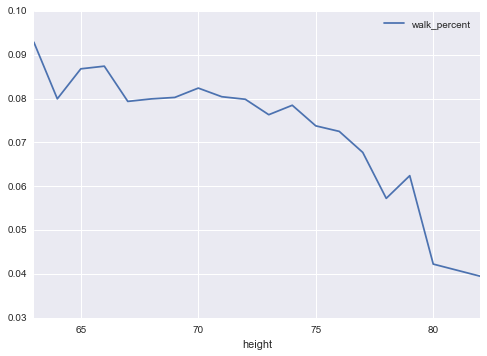

In [41]:
grouped.plot(x='height', y='walk_percent')
grouped.describe()

In [42]:
number_players_by_height = walks_height_table.groupby('height').size().reset_index()
number_players_by_height.head

<bound method DataFrame.head of     height     0
0     63.0     6
1     64.0    11
2     65.0    30
3     66.0   109
4     67.0   228
5     68.0   395
6     69.0   645
7     70.0  1055
8     71.0  1304
9     72.0  1459
10    73.0  1157
11    74.0  1001
12    75.0   584
13    76.0   328
14    77.0   148
15    78.0    45
16    79.0    23
17    80.0     5
18    82.0     2>

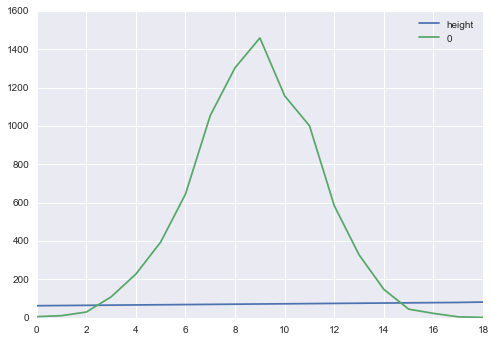

In [43]:
number_players_by_height.plot()

# ** Summary ** #

Intuitively, one would potentially think that a shorter baseball player would have a smaller batting strike zone and therefore receive more walks than average or taller players. This review indicates that would be a reasonable premise for a deeper statsistical analysis.

# ** References ** #
http://pbi.becausecollective.com/baseball-beginner-faqs/

http://www.businessinsider.com/mlb-strike-zone-2014-9

https://www.google.com/search?q=baseball+strike+zone&rlz=1C1TSNF_enUS417US417&espv=2&biw=1093&bih=510&tbm=isch&tbo=u&source=univ&sa=X&ved=0ahUKEwjrjOmp-a_PAhXH4yYKHQVNAwYQsAQIQg&dpr=1.25

https://en.wikipedia.org/wiki/Eddie_Gaedel
